In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ex1: Analise e quantifique a relação da variável survived com a variável sex usando o conjunto de dados do titanic. Faça seus gráficos e calcule o chi-quadrado para quantificar a relação.

In [2]:
df = pd.read_csv("titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
frameTitanic = pd.DataFrame()
list = []

for i in df.Sex:
    if i == 'male':
        list.append(0)
    elif i == 'female':
        list.append(1)

frameTitanic['sobreviveu'] = df.Survived
frameTitanic['sexo'] = list
del list

In [13]:
# probabilidade de sobreviver geral:

ft = frameTitanic

probH = ft[(ft.sobreviveu==1) & (ft.sexo==0)].shape[0] / ft[ft.sexo==0].shape[0] *100
probM = ft[(ft.sobreviveu==1) & (ft.sexo==1)].shape[0] / ft[ft.sexo==1].shape[0] *100

print(f" A probabilidade de sobreviver sendo homem é { round(probH) }%, enquanto sendo mulher é { round(probM)}%")

 A probabilidade de sobreviver sendo homem é 19%, enquanto sendo mulher é 74%


In [14]:
dist_geral = round(ft.sobreviveu.value_counts()/ ft.sobreviveu.shape[0], 2)

In [19]:
df_sexo = ft.groupby('sexo').apply(lambda x: x.sobreviveu.value_counts()).unstack()
df_sexo_pct = ft.groupby('sexo').apply(lambda x: x.sobreviveu.value_counts()/x.shape[0]).unstack()

df_sexo['total'] = df_sexo['total'] = df_sexo[[0]].values + df_sexo[[1]].values
df_sexo

,0,1,total
sexo,,,
0,468,109,577
1,81,233,314


In [32]:
#ESPERADO:

esp_0 = df_sexo.total.values * dist_geral.iloc[0]
esp_1 = df_sexo.total.values * dist_geral.iloc[1]

df_esp = pd.DataFrame(np.c_[esp_0,esp_1])

df_esp

,0,1
0,357.74,219.26
1,194.68,119.32


In [33]:
# Cálculo do chi-quadrado

# Observado menos o esperado: o_i - e_i == desvio
desvios = (df_sexo.iloc[:,:2].values - df_esp.values)
print(desvios)

#(o_i - e_i)^2
desvios_ao_quadaro = desvios**2

#(o_i - e_i)^2 / e_i

chi_quad = sum(sum(desvios_ao_quadaro/df_esp.values))

print("\nO chi-quadrado de Pearson é de:", chi_quad, "indicando uma 'boa' relação entre as variáveis!")

[[ 110.26 -110.26]
 [-113.68  113.68]]

O chi-quadrado de Pearson é de: 264.11838848422303 indicando uma 'boa' relação entre as variáveis!


Ex3: Use o dataframe df, carregado abaixo, onde  cada observação corresponde a uma reclamação feita 
pelo consumidor, para responder as perguntas abaixo:

1 - Qual o número de reclamações por Estado?<br>
2 - Qual a quantidade de reclamações por sexo?<br>
3 - O tempo de resposta tem alguma correlação com a nota do consumidor?<br>
4 - Proporção de reclamações registradas e não respondidas.<br>
5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. 
**Importante**: É interessante que as análises contenham gráficos. No dia-a-dia de um cientista, grande parte do  trabalho é analisar dados e gerar visualizações para apresentá-las.

_fonte_ : https://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1 (Nesse link estão os dicionário de dados, caso possua dúvidas sobre base).

In [34]:
data = pd.read_csv('dadosgovbr---2014.csv', sep=";", encoding="latin-1")

data.columns

Index(['Gestor', 'Canal de Origem', 'Região', 'UF', 'Cidade', 'Sexo',
       'Faixa Etária', 'Ano Abertura', 'Mês Abertura', 'Data Abertura',
       'Hora Abertura', 'Data Resposta', 'Hora Resposta', 'Data Análise',
       'Hora Análise', 'Data Recusa', 'Hora Recusa', 'Data Finalização',
       'Hora Finalização', 'Prazo Resposta', 'Prazo Analise Gestor',
       'Tempo Resposta', 'Nome Fantasia', 'Segmento de Mercado', 'Área',
       'Assunto', 'Grupo Problema', 'Problema', 'Como Comprou Contratou',
       'Procurou Empresa', 'Respondida', 'Situação', 'Avaliação Reclamação',
       'Nota do Consumidor', 'Análise da Recusa', 'Edição de Conteúdo',
       'Interação do Gestor', 'Total'],
      dtype='object')

In [15]:
data = data.rename({
    'Tempo Resposta': 'tempoResposta',
    'Nota do Consumidor': 'notaConsumidor',
    'Avaliação Reclamação': 'avaliouReclamacao',
    'Canal de Origem': 'canalOrigem',
    'Faixa Etária': 'faixaEtaria',
    'Ano Abertura': 'anoAbertura',
    'Gestor': 'gestor',
    'Prazo Resposta': 'prazoResposta',
    'Grupo Problema': 'grupoProblema',
}, axis=1)

In [4]:
data.isnull().sum()

Gestor                        0
Canal de Origem               0
Região                        0
UF                            0
Cidade                        0
Sexo                          0
Faixa Etária                  0
Ano Abertura                  0
Mês Abertura                  0
Data Abertura                 0
Hora Abertura                 0
Data Resposta              2026
Hora Resposta              2026
Data Análise              42034
Hora Análise              42034
Data Recusa               41921
Hora Recusa               41921
Data Finalização              0
Hora Finalização              0
Prazo Resposta                0
Prazo Analise Gestor      42034
Tempo Resposta             2026
Nome Fantasia                 0
Segmento de Mercado           0
Área                          0
Assunto                       0
Grupo Problema                0
Problema                      0
Como Comprou Contratou        0
Procurou Empresa              0
Respondida                    0
Situação

In [5]:
data.describe()

,Ano Abertura,Mês Abertura,Prazo Analise Gestor,Tempo Resposta,Nota do Consumidor,Total
count,43987.0,43987.000000,1953.000000,41961.000000,28627.000000,43987.0
mean,2014.0,9.550435,4.768049,6.667572,3.007021,1.0
std,0.0,1.898572,4.395177,3.066805,1.681700,0.0
min,2014.0,5.000000,0.000000,0.000000,1.000000,1.0
25%,2014.0,8.000000,1.000000,4.000000,1.000000,1.0
50%,2014.0,10.000000,4.000000,8.000000,3.000000,1.0
75%,2014.0,11.000000,8.000000,9.000000,5.000000,1.0
max,2014.0,12.000000,15.000000,13.000000,5.000000,1.0


1 - Qual o número de reclamações por Estado?

A quantidade de reclamações por estado é:



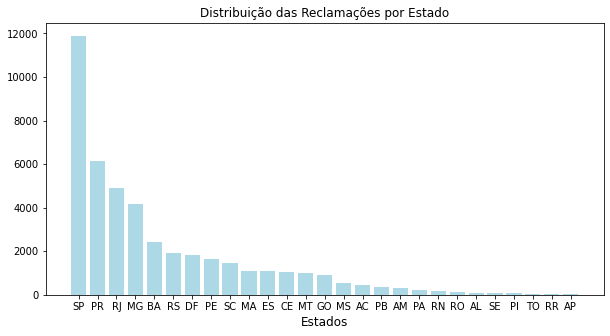


SP    11882
PR     6140
RJ     4907
MG     4186
BA     2443
RS     1941
DF     1805
PE     1626
SC     1458
MA     1082
ES     1081
CE     1068
MT     1012
GO      886
MS      531
AC      449
PB      343
AM      291
PA      211
RN      160
RO      119
AL      104
SE       97
PI       77
TO       46
RR       24
AP       18
Name: UF, dtype: int64


In [7]:
dt = pd.DataFrame()

listi = []
listd = []

for i in data.UF.unique():
    d = data.loc[data.UF == i].UF.value_counts().sum()
    listi.append(i)
    listd.append(d)

dt['estado'] = listi
dt['reclamacoes'] = listd

dt = dt.sort_values('reclamacoes', ascending=False)

print("A quantidade de reclamações por estado é:\n")

plt.figure(figsize=[10,5])
plt.title("Distribuição das Reclamações por Estado")
plt.bar(dt['estado'], dt['reclamacoes'], color = 'lightblue')
plt.xlabel('Estados', {'fontsize': 12}) #legenda no eixo x
plt.show()

print(f'\n{data.UF.value_counts()}')

2 - Qual a quantidade de reclamações por sexo?

A quantidade de reclamações por sexo é: 

M    27895
F    16092
Name: Sexo, dtype: int64



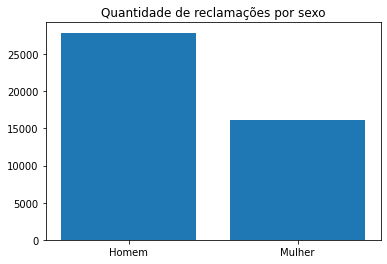

In [8]:
print('A quantidade de reclamações por sexo é: \n')
print(data.Sexo.value_counts())
print()


homem = data.Sexo.value_counts().M
mulher =  data.Sexo.value_counts().F

valor = ['Homem', 'Mulher']
freq = [homem, mulher]

plt.title("Quantidade de reclamações por sexo")

plt.bar(valor, freq)
plt.show()


3 - O tempo de resposta tem alguma correlação com a nota do consumidor?

In [14]:
frameCorrelacao = pd.DataFrame({
    'tempoResposta': data.tempoResposta,
    'notaConsumidor': data.notaConsumidor,
})

correlacao = frameCorrelacao.corr()[['tempoResposta']]

print(f"A correlação entre a nota do consumidor e o tempo de resposta é de {round(correlacao.tempoResposta.notaConsumidor, 2)}, indicando uma pequena correlação negativa entre as duas variáveis.\n")
print(correlacao)



A correlação entre a nota do consumidor e o tempo de resposta é de -0.19, indicando uma pequena correlação negativa entre as duas variáveis.

                tempoResposta
tempoResposta         1.00000
notaConsumidor       -0.18715


4 - Proporção de reclamações registradas e não respondidas.


A proporção de reclamações registradas e não respondidas é de 0.05% em relação ao total de reclamações.



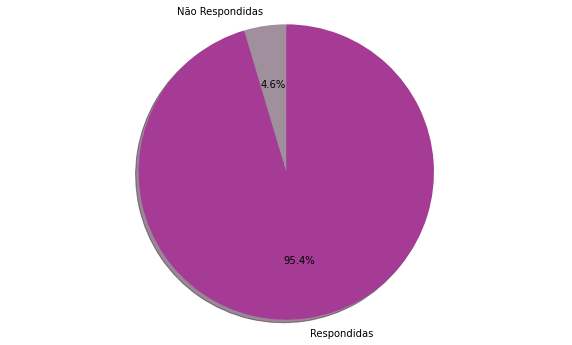

In [12]:
print(f'\nA proporção de reclamações registradas e não respondidas é de {round( data.Respondida.value_counts().N / data.Respondida.shape[0] ,    2)}% em relação ao total de reclamações.\n')

responstaS = round((data.Respondida.value_counts().N / data.Respondida.shape[0]) * 100, 2)
respostaN =  round((data.Respondida.value_counts().S / data.Respondida.shape[0]) * 100, 2)

labels = 'Não Respondidas', 'Respondidas'
sizes = [responstaS, respostaN]

c = ['#A08F9D', '#A63B95']

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=c)

ax1.axis('equal')
plt.show()



5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. Importante: É interessante que as análises contenham gráficos. No dia-a-dia de um cientista, grande parte do trabalho é analisar dados e gerar visualizações para apresentá-las.

In [272]:
data.columns

Index(['gestor', 'canalOrigem', 'Região', 'UF', 'Cidade', 'Sexo',
       'faixaEtaria', 'anoAbertura', 'Mês Abertura', 'Data Abertura',
       'Hora Abertura', 'Data Resposta', 'Hora Resposta', 'Data Análise',
       'Hora Análise', 'Data Recusa', 'Hora Recusa', 'Data Finalização',
       'Hora Finalização', 'Prazo Resposta', 'Prazo Analise Gestor',
       'tempoResposta', 'Nome Fantasia', 'Segmento de Mercado', 'Área',
       'Assunto', 'Grupo Problema', 'Problema', 'Como Comprou Contratou',
       'Procurou Empresa', 'Respondida', 'Situação', 'avaliouReclamacao',
       'notaConsumidor', 'Análise da Recusa', 'Edição de Conteúdo',
       'Interação do Gestor', 'Total'],
      dtype='object')

In [18]:
origemNaoIdentificado = data.loc[data.canalOrigem == 'Não identificado']
origemNaoIdentificado = round(origemNaoIdentificado.faixaEtaria.value_counts() / origemNaoIdentificado.shape[0] *100, 2)

origemPlataformaWeb = data.loc[data.canalOrigem == 'Plataforma Web']
origemPlataformaWeb = round(origemPlataformaWeb.faixaEtaria.value_counts() / origemPlataformaWeb.shape[0] *100, 2)

print(origemNaoIdentificado)
print()
print(origemPlataformaWeb)

entre 31 a 40 anos    38.70
entre 21 a 30 anos    20.29
entre 41 a 50 anos    19.51
entre 51 a 60 anos    12.58
entre 61 a 70 anos     6.62
mais de 70 anos        2.26
até 20 anos            0.03
Name: faixaEtaria, dtype: float64

entre 31 a 40 anos    37.43
entre 21 a 30 anos    21.32
entre 41 a 50 anos    18.53
entre 51 a 60 anos    12.62
entre 61 a 70 anos     6.89
mais de 70 anos        3.18
até 20 anos            0.04
Name: faixaEtaria, dtype: float64


In [22]:
data.corr()

,anoAbertura,Mês Abertura,Prazo Analise Gestor,tempoResposta,notaConsumidor,Total
anoAbertura,NaN,NaN,NaN,NaN,NaN,NaN
Mês Abertura,NaN,1.000000,0.194573,-0.035776,0.073964,NaN
Prazo Analise Gestor,NaN,0.194573,1.000000,0.082552,-0.068360,NaN
tempoResposta,NaN,-0.035776,0.082552,1.000000,-0.187150,NaN
notaConsumidor,NaN,0.073964,-0.068360,-0.187150,1.000000,NaN
Total,NaN,NaN,NaN,NaN,NaN,NaN


Qual é a proporção de problemas avaliados, Resolvidos e não resolvidos?



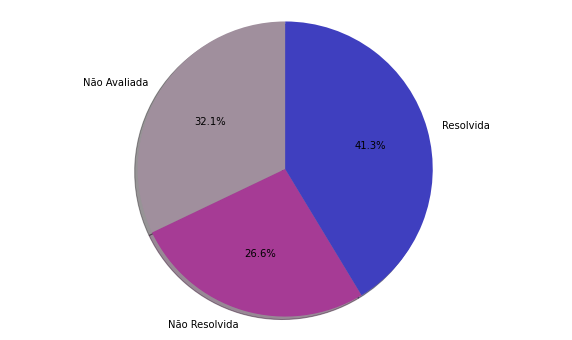

In [23]:
print("Qual é a proporção de problemas avaliados, Resolvidos e não resolvidos?\n")
value = [i for i in data.avaliouReclamacao.unique()]

naoAvaliada = data.avaliouReclamacao.value_counts()['Não Avaliada']
naoResolvida = data.avaliouReclamacao.value_counts()['Não Resolvida']
resolvida = data.avaliouReclamacao.value_counts()['Resolvida']

labels = value[0:3]
sizes = [naoAvaliada, naoResolvida, resolvida]

c = ['#A08F9D', '#A63B95', '#3F3FBF']

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=c)

ax1.axis('equal')
plt.show()


Qual é a média das notas por grupo de problema?



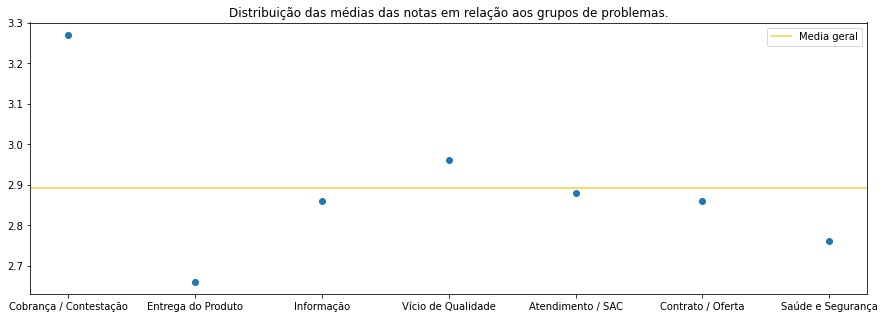

In [26]:
print("\nQual é a média das notas por grupo de problema?\n")

list = []
list1=[]

for i in data.grupoProblema.unique():
    d = data.loc[data.grupoProblema == i]
    list.append(i)
    list1.append(round(d.notaConsumidor.mean(), 2))

frameProblemas = pd.DataFrame()
frameProblemas['grupoProblema'] = list
frameProblemas['mediaNotaConsumidor'] = list1

plt.figure(figsize=([15,5]))
plt.title("Distribuição das médias das notas em relação aos grupos de problemas.")
plt.scatter(frameProblemas['grupoProblema'], frameProblemas['mediaNotaConsumidor'])
plt.axhline(y=frameProblemas.mediaNotaConsumidor.mean(), xmin=0, xmax=1, color='#f4d03f', label='Media geral')
plt.legend()
plt.show()



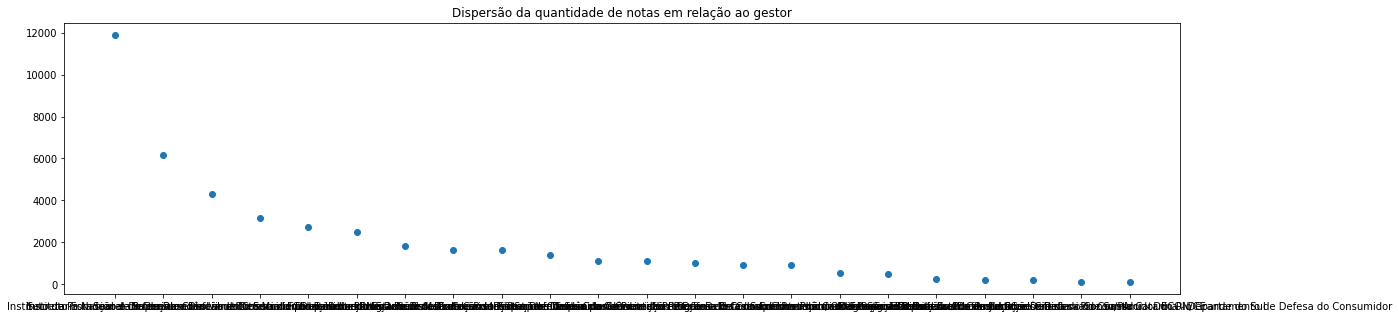

Fundação de Proteção e Defesa do Consumidor                                                             11900
Departamento Estadual de Proteção e Defesa do Consumidor                                                 6165
Programa Estadual de Proteção e Defesa do Consumidor                                                     4314
Secretaria Nacional do Consumidor                                                                        3164
Instituto Municipal de Proteção e Defesa do Consumidor                                                   2724
Superintendência de Proteção e Defesa do Consumidor do Estado da Bahia                                   2464
Instituto de Defesa do Consumidor - Procon                                                               1801
Secretaria de Desenvolvimento Social e Direitos Humanos - Procon                                         1634
Nucleo de Defesa do Consumidor da Defensoria Publica                                                     1600
Departamen

In [31]:

plt.figure(figsize=([20,5]))
plt.title("Dispersão da quantidade de notas em relação ao gestor")
plt.scatter(data.gestor.unique(), data.gestor.value_counts())
plt.show()

data.gestor.value_counts()

In [160]:
# Resposnidas por Gestor
rows = []

for i in data.gestor.unique():
    d = data.loc[data.gestor == i].avaliouReclamacao.value_counts()
    rows.append([
        i, 
        d.sum(), 
        round((d.sum() / data.gestor.shape[0]) *100, 2),
        round((d.Resolvida / d.sum() *100), 2),
        round((d['Não Resolvida'] / d.sum() *100), 2),
        round((d['Não Avaliada'] / d.sum() *100), 2), 

        d['Resolvida'],
        d['Não Resolvida'],
        d['Não Avaliada'],
        ])

frameGestor = pd.DataFrame(rows, columns=[
    'gestor', 
    'totalReclamacoes', 
    '%_totalReclamacoes', 
    '%_Resolvida',
    '%_NaoResolvidas',
    '%_NaoAvaliado', 
    'Resolvidas', 
    'NãoResolvidas',
    'NaoAvaliadas', 
])

frameGestor = frameGestor.sort_values('totalReclamacoes', ascending=False)
frameGestor

,gestor,totalReclamacoes,%_totalReclamacoes,%_Resolvida,%_NaoResolvidas,%_NaoAvaliado,Resolvidas,NãoResolvidas,NaoAvaliadas
6,Fundação de Proteção e Defesa do Consumidor,11322,25.74,42.82,28.78,28.40,4848,3259,3215
7,Departamento Estadual de Proteção e Defesa do ...,5980,13.59,40.69,22.86,36.45,2433,1367,2180
8,Programa Estadual de Proteção e Defesa do Cons...,4108,9.34,39.87,32.13,27.99,1638,1320,1150
0,Secretaria Nacional do Consumidor,3040,6.91,39.11,23.52,37.37,1189,715,1136
5,Instituto Municipal de Proteção e Defesa do Co...,2615,5.94,39.08,30.52,30.40,1022,798,795
13,Superintendência de Proteção e Defesa do Consu...,2337,5.31,39.20,27.73,33.08,916,648,773
10,Instituto de Defesa do Consumidor - Procon,1749,3.98,39.97,26.59,33.45,699,465,585
3,Secretaria de Desenvolvimento Social e Direito...,1572,3.57,45.42,25.70,28.88,714,404,454
14,Nucleo de Defesa do Consumidor da Defensoria P...,1514,3.44,40.29,28.07,31.64,610,425,479
20,Departamento de Proteção e Defesa do Consumido...,1352,3.07,39.42,21.60,38.98,533,292,527


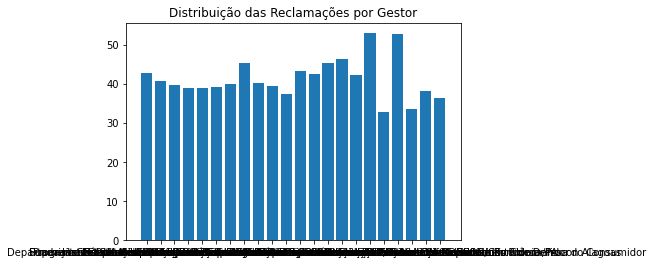

In [169]:
#plt.figure(figsize=([,10]))
plt.title('Distribuição das Reclamações por Gestor')
plt.bar(frameGestor['gestor'], frameGestor['%_Resolvida'])

#plt.axhline(y=frameGestor['totalReclamacoes'].mean(), xmin=0, xmax=1, color='#f4d03f', label='Media geral')

plt.show()